# Homework 1

**The following notebook is meant to help you work through Problems 1, 2, and 3 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [178]:
# loading data

import numpy as np
import matplotlib.pyplot as plt
from cmath import exp
import math
train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]

from T1_P1_TestCases import test_p1
from T1_P2_TestCases import test_p2

# Problem 1

## Problem 1 Subpart 1

In [179]:
def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_array.

    :param x_array: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param x_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    def k_tau(x, x_prime):
        return exp(-((x - x_prime) ** 2) / tau)


    def f_tau(x_star):
        return sum([k_tau(x_train[i], x_star) * y_train[i] for i in range(len(x_train))]) / sum([k_tau(x_train[i], x_star) for i in range(len(x_train))])


    return np.array([f_tau(x_new[i]) for i in range(len(x_new))])

In [180]:
test_p1(kernel_regressor)

Passed


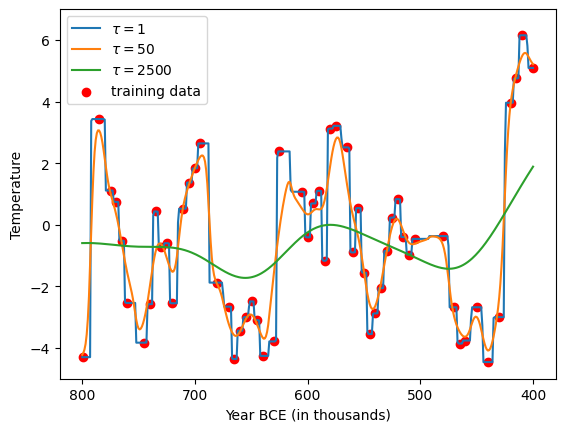

In [181]:
# plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.1.png
plt.savefig("images/p1.1.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 4

In [182]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    M = len(predictions)
    return (1/M) * sum([(true[m] - predictions[m]) ** 2 for m in range(len(predictions))]) 

In [183]:
for tau in [1, 50, 2500]:
    print(f"tau = {tau}: loss = {model_mse(kernel_regressor(year_test, tau, year_train, temp_train), temp_test)}")

tau = 1: loss = (1.9472621565209178+0j)
tau = 50: loss = (1.8582899169613452+0j)
tau = 2500: loss = (8.333886806980793+0j)


# Problem 2

## Problem 2 Subpart 1

In [184]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_array = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """

    # Distance function, where higher values mean more similar
    def kernel(x, x_prime):
        sigma = 2500
        return exp((- (x - x_prime) ** 2) / sigma)


    def f_knn(x):
        distances = [kernel(x, x_train[i]) for i in range(len(x_train))] # list of 'distances' from x to each x_train
        indices = np.argsort(distances) # indices of x_train sorted by distance from x
        return sum([y_train[indices[len(indices) - i - 1]] for i in range(k)]) / k # average of the k nearest neighbors, taking the last k elements of indices


    return np.array([f_knn(x_new[i]) for i in range(len(x_new))])

In [185]:
test_p2(predict_knn)

Passed


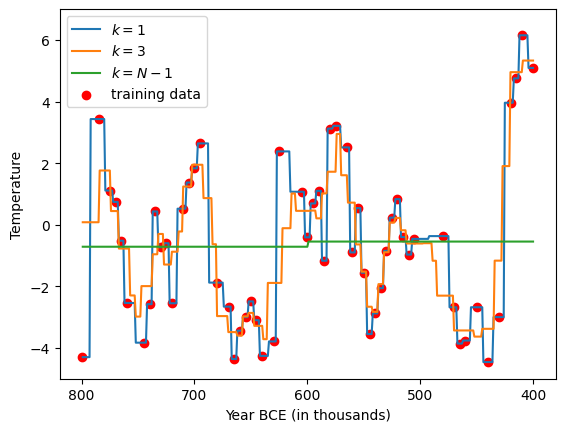

In [186]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-5,7])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("images/p2.1.png", bbox_inches = "tight")
plt.show()

## Problem 2 Subpart 4

In [187]:
# choose your value of k and calculate the loss
for k in [1, 3, 55]:
    print(model_mse(predict_knn(year_test, k, year_train, temp_train), temp_test))

1.7406000000000004
3.8907662222222212
9.663973240330577


# Problem 3

## Problem 3 Subpart 1

In [188]:
## don't change anything here
def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X
###

In [189]:
# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`
def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  phi_X = []
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  if part == 'a':
    # TODO: Implement this
    pass
  elif part=='b':
    # TODO
    pass
  elif part=='c':
    # TODO
    pass
  elif part=='d':
    # TODO
    pass

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [190]:
# Find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

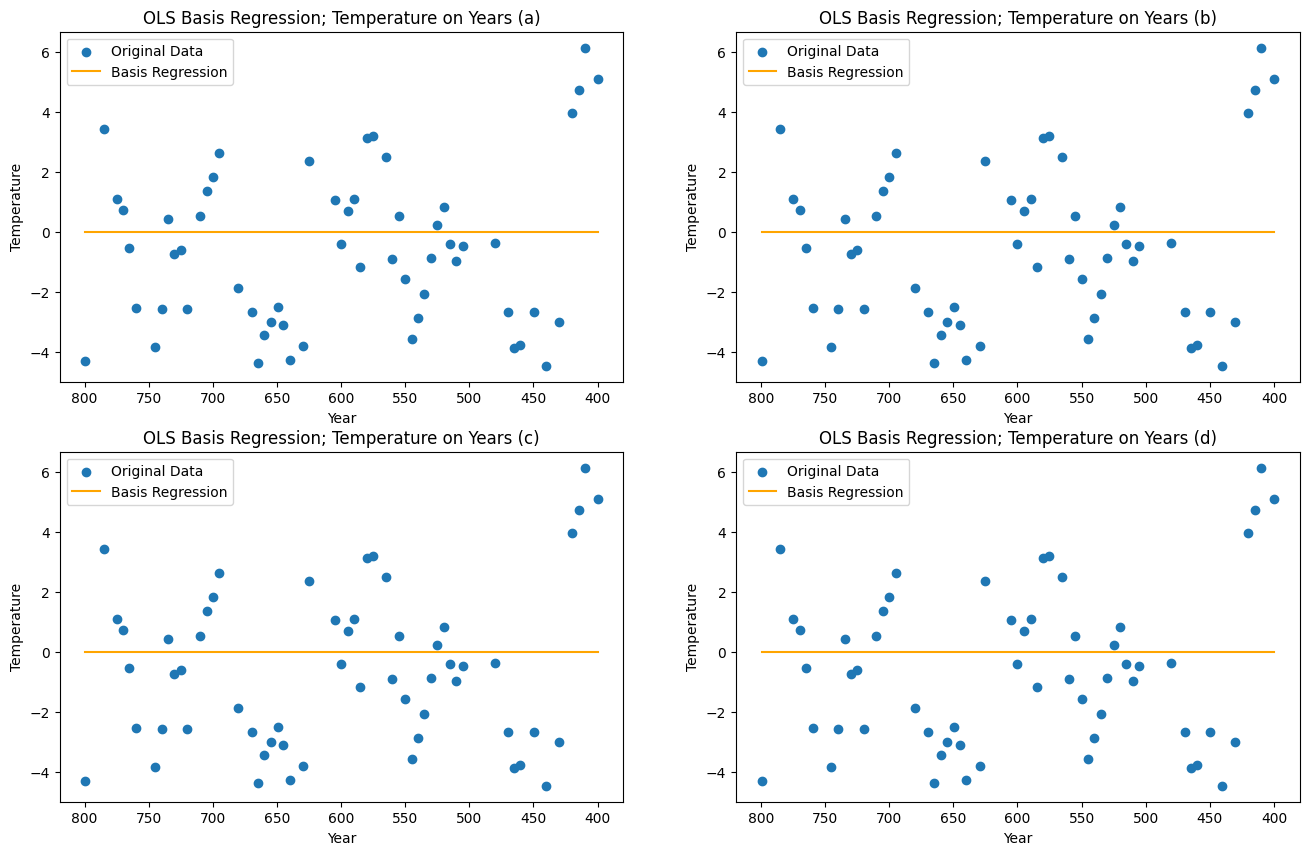

In [191]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")
  ax[i//2, i%2].invert_xaxis()

  xs = np.linspace(year_train.min(), year_train.max(), 1000)

  # TODO: plot your functions for the specified xs
  y_pred = [0 for _ in xs]
  ax[i//2, i%2].plot(xs, y_pred, color = 'orange', label = "Basis Regression")


  ax[i//2, i%2].legend()

plt.savefig("images/p3.1.png")
  


## Problem 3 Subpart 2

In [192]:
def mean_squared_error(X,y, w):
  # TODO: Given a linear regression model with parameter w, compute and return the
  # mean squared error.
  pass

def negative_log_likelihood(X,y,w, sigma):
  # TODO: Given a probabilistic linear regression model y = w^T x + e, where
  # e is N(0, sigma), return the negative log likelihood of the data X,y.
  pass


In [193]:
for part in ['a', 'b', 'c', 'd']:
  # TODO: compute the MSE and Likelihood and print the results

  train_mse = 181
  test_mse = 181
  
  print(f"\nPart ({part});\n\n Train MSE: {train_mse:.2f}; Test MSE: {test_mse:.2f}\n")
  
  # TODO: compute the likelihood. 
  train_log_nll = 181
  test_log_nll = 181
  print(f" Train Negative Log-Likelihood: {train_log_nll:.3f}; Test Negative Log-Likelihood: {test_log_nll:.3f}")


Part (a);

 Train MSE: 181.00; Test MSE: 181.00

 Train Negative Log-Likelihood: 181.000; Test Negative Log-Likelihood: 181.000

Part (b);

 Train MSE: 181.00; Test MSE: 181.00

 Train Negative Log-Likelihood: 181.000; Test Negative Log-Likelihood: 181.000

Part (c);

 Train MSE: 181.00; Test MSE: 181.00

 Train Negative Log-Likelihood: 181.000; Test Negative Log-Likelihood: 181.000

Part (d);

 Train MSE: 181.00; Test MSE: 181.00

 Train Negative Log-Likelihood: 181.000; Test Negative Log-Likelihood: 181.000
